# Cow Solver Exploratory Notebook

This notebook examines the `cow_chain_df`, which is a dataset that combines chainlink prices with the cow solver's swap data.

In [31]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cd ..

/home/evan/Documents/github/Feedlot


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
#display as integer format
pd.options.display.float_format = '{:,.0f}'.format # display as dollar currency

In [4]:
# load cow swaps dataset
cow_chain_df = pd.read_csv('data/transformed/cow_chain_swaps.csv', low_memory=False)

In [6]:
# add buyAmountEthUSD and sellAmountEthUSD columns
cow_chain_df['buyAmountChainPrice'] = cow_chain_df['buyAmountEth'] * cow_chain_df['eth_chain_price']
cow_chain_df['sellAmountChainPrice'] = cow_chain_df['sellAmountEth'] * cow_chain_df['eth_chain_price']

In [7]:
# filter cow_chain_df for active = True and environment = 'prod'
active_cow_solvers_df = cow_chain_df[(cow_chain_df['active'] == True) & (cow_chain_df['environment'] == 'prod')]

In [45]:
active_cow_solvers_df.head(10)

,timestamp_x,gasPrice,feeAmount,txHash,settlement,buyAmount,sellAmount,order,buyAmountEth,sellAmountEth,buyAmountUsd,sellAmountUsd,solvers,environment,name,active,sellTokenSymbol,sellTokenDecimals,buyTokenSymbol,buyTokenDecimals,date,id,assetPair_id,eth_chain_timestamp,price_x,timestamp,eth_chain_price,buyAmountChainPrice,sellAmountChainPrice
244948,1656148293,25294487626,3086419753086419,0x7648785f814b1337f56077441821d05f4ca5ea27dcd745a2f3bce42e419c9019,0x7648785f814b1337f56077441821d05f4ca5ea27dcd745a2f3bce42e419c9019,118799629,100000000000000000,0x5920aa227814ba5e2b060b39452b3368be8ec3cb7d256ba293d4ff3e8f47e7412caef7f0ee82fb0abf1ab0dcd3a093803002e70562b6ed29,0,0,119,123,0x149d0f9282333681ee41d30589824b2798e9fb47,prod,PLM,True,WETH,18,USDC,6,2022-06-25 09:11:33,USDC/USD/0x62b6ef8f,USDC/USD,"1,656,156,047",1,1656147356,"1,228",119,123
244949,1656148293,25294487626,3086419753086419,0x7648785f814b1337f56077441821d05f4ca5ea27dcd745a2f3bce42e419c9019,0x7648785f814b1337f56077441821d05f4ca5ea27dcd745a2f3bce42e419c9019,118799629,100000000000000000,0x5920aa227814ba5e2b060b39452b3368be8ec3cb7d256ba293d4ff3e8f47e7412caef7f0ee82fb0abf1ab0dcd3a093803002e70562b6ed29,0,0,119,123,0x149d0f9282333681ee41d30589824b2798e9fb47,prod,PLM,True,WETH,18,USDC,6,2022-06-25 09:11:33,ETH/USD/0x62b6cd9c,WETH/USD,"1,656,147,356","1,228",1656147356,"1,228",119,123
244950,1656148676,26041976442,19558470,0x9366b851b5d84f898962fce62356f1d020f3220ec794476eb19cd8106ca08283,0x9366b851b5d84f898962fce62356f1d020f3220ec794476eb19cd8106ca08283,72805106915243122046716,76641080534,0x2e0258b9b388fb04acd9e80e747ddbdbdb52e6d255bc27bbc607c093af4f2284711d1d8e8b2b468c92c202127a2bbfefc14bf10562b8cea8,61,62,"70,404","76,641",0xb20b86c4e6deeb432a22d773a221898bbbd03036,prod,Gnosis_1inch,True,USDC,6,yvBOOST,18,2022-06-25 09:17:56,USDC/USD/0x62b6ef8f,USDC/USD,"1,656,156,047",1,1656149635,"1,235","74,809","77,121"
244952,1656149849,18023628192,3086419753086419,0xcf1783c5b7ba996961115be1469b41f074b818004251cd1426dcf11d566daa02,0xcf1783c5b7ba996961115be1469b41f074b818004251cd1426dcf11d566daa02,1106236917,900000000000000000,0xc566dbff218da6d8c7020883a3f147b1fc6a6d24cfb8ea376d589a718c8eee6ba6ee8ded46c173e43f84f02cdfc95cfcb2b12a2a62b6de22,1,1,"1,106","1,110",0x149d0f9282333681ee41d30589824b2798e9fb47,prod,PLM,True,WETH,18,USDC,6,2022-06-25 09:37:29,ETH/USD/0x62b6d683,WETH/USD,"1,656,149,635","1,235",1656149635,"1,235","1,108","1,111"
244953,1656149849,18023628192,3086419753086419,0xcf1783c5b7ba996961115be1469b41f074b818004251cd1426dcf11d566daa02,0xcf1783c5b7ba996961115be1469b41f074b818004251cd1426dcf11d566daa02,1106236917,900000000000000000,0xc566dbff218da6d8c7020883a3f147b1fc6a6d24cfb8ea376d589a718c8eee6ba6ee8ded46c173e43f84f02cdfc95cfcb2b12a2a62b6de22,1,1,"1,106","1,110",0x149d0f9282333681ee41d30589824b2798e9fb47,prod,PLM,True,WETH,18,USDC,6,2022-06-25 09:37:29,USDC/USD/0x62b6ef8f,USDC/USD,"1,656,156,047",1,1656149635,"1,235","1,108","1,111"
244954,1656150107,16032321973,751403106801276032,0x2fe73711541f06e5285536df1b7ae15b2b5c3a52da9e53eb2f20b9ba723cbe74,0x2fe73711541f06e5285536df1b7ae15b2b5c3a52da9e53eb2f20b9ba723cbe74,26175132661722087,7108117572373675518,0x43ae40b62a8769a1ec21a0e4b7e3cd03751b36a56e1cbb43d933c0c6f661b77962fbd25106715a244a904dac2152133c65c642ad62b6dee3,0,0,32,36,0x149d0f9282333681ee41d30589824b2798e9fb47,prod,PLM,True,CVX,18,NaN,18,2022-06-25 09:41:47,CVX/USD/0x62b6d4b4,CVX/USD,"1,656,149,172",5,1656149635,"1,235",32,36
244955,1656151139,20052417508,3344280142162976256,0xdbff21da2e022d560f8bbc4d9c456ef75c9f05aa970557d0214f113ef92cd83e,0xdbff21da2e022d560f8bbc4d9c456ef75c9f05aa970557d0214f113ef92cd83e,202846779,200958605106662470000,0x582cae47b62012d1b386b2de823081ef42b79c9e5962f930026a879d3910cb769a82aa6edbc473a883b8906bf41084c9c1b760f262b6e2e8,0,0,203,203,0xf7995b6b051166ea52218c37b8d03a2a6bbef3da,prod,Gnosis_BalancerSOR,True,LUSD,18,USDC,6,2022-06-25 09:58:59,LUSD/USD/0x62b6e095,LUSD/USD,"1,656,152,213",1,1656151013,"1,228",203,203
244956,1656151139,20052417508,33

In [8]:
# Subgraph data reveals inaccuracies with a similar SQL query from Dune - V2: Ranked Active Solvers https://dune.com/queries/1756858/2896548
active_cow_solvers_df.groupby(['name', 'solvers']).size().sort_values(ascending=False)

name                solvers                                   
Otex                0xc9ec550bea1c64d779124b23a26292cc223327b6    37935
PLM                 0x149d0f9282333681ee41d30589824b2798e9fb47    32799
Laertes             0xa21740833858985e4d801533a808786d3647fb83    17024
Gnosis_1inch        0xb20b86c4e6deeb432a22d773a221898bbbd03036    15295
QuasiModo           0x731a0a8ab2c6fcad841e82d06668af7f18e34970     8871
Gnosis_0x           0xda869be4adea17ad39e1dfece1bc92c02491504f     5740
DexCowAgg           0x6d1247b8acf4dfd5ff8cfd6c47077ddc43d4500e     5596
Gnosis_ParaSwap     0xe9ae2d792f981c53ea7f6493a17abf5b2a45a86b     5327
Quasilabs           0x97ec0a17432d71a3234ef7173c6b48a2c0940896     2697
MIP                 0xe8ff24ec26bd46e0140d1824da44efad2a0920b5     1838
Baseline            0x3cee8c7d9b5c8f225a8c36e7d3514e1860309651     1592
Seasolver           0x398890be7c4fac5d766e1aeffde44b2ee99f38ef     1026
Gnosis_BalancerSOR  0xf7995b6b051166ea52218c37b8d03a2a6bbef3da      857
N

In [54]:
# find most common buy tokens
active_cow_solvers_df.groupby(['name', 'solvers', 'buyTokenSymbol']).size().sort_values(ascending=False).head(10)

name          solvers                                     buyTokenSymbol
Otex          0xc9ec550bea1c64d779124b23a26292cc223327b6  USDC              12075
PLM           0x149d0f9282333681ee41d30589824b2798e9fb47  USDC              11020
Gnosis_1inch  0xb20b86c4e6deeb432a22d773a221898bbbd03036  USDC               5601
Laertes       0xa21740833858985e4d801533a808786d3647fb83  USDC               5417
Otex          0xc9ec550bea1c64d779124b23a26292cc223327b6  WETH               4085
PLM           0x149d0f9282333681ee41d30589824b2798e9fb47  WETH               3437
QuasiModo     0x731a0a8ab2c6fcad841e82d06668af7f18e34970  USDC               3071
PLM           0x149d0f9282333681ee41d30589824b2798e9fb47  USDT               2843
Otex          0xc9ec550bea1c64d779124b23a26292cc223327b6  USDT               2558
PLM           0x149d0f9282333681ee41d30589824b2798e9fb47  DAI                2315
dtype: int64

In [53]:
# find most common sell tokens
active_cow_solvers_df.groupby(['name', 'solvers', 'sellTokenSymbol']).size().sort_values(ascending=False).head(10)

name          solvers                                     sellTokenSymbol
Otex          0xc9ec550bea1c64d779124b23a26292cc223327b6  USDC               10309
                                                          WETH               10268
PLM           0x149d0f9282333681ee41d30589824b2798e9fb47  USDC                9516
                                                          WETH                8791
Laertes       0xa21740833858985e4d801533a808786d3647fb83  USDC                4808
Gnosis_1inch  0xb20b86c4e6deeb432a22d773a221898bbbd03036  USDC                4005
Laertes       0xa21740833858985e4d801533a808786d3647fb83  WETH                3520
QuasiModo     0x731a0a8ab2c6fcad841e82d06668af7f18e34970  WETH                3123
Gnosis_1inch  0xb20b86c4e6deeb432a22d773a221898bbbd03036  WETH                2488
QuasiModo     0x731a0a8ab2c6fcad841e82d06668af7f18e34970  USDC                2423
dtype: int64

In [62]:
# Find the most active buy and sell token symbols
cow_buy = active_cow_solvers_df.groupby(['name', 'solvers', 'buyTokenSymbol']).size().sort_values(ascending=False)
cow_sell = active_cow_solvers_df.groupby(['name', 'solvers', 'sellTokenSymbol']).size().sort_values(ascending=False)

In [63]:
# join two series together with concat
cow_buy_sell_vol = pd.concat([cow_buy, cow_sell], axis=1)
cow_buy_sell_vol.columns = ['buyTokenSymbol', 'sellTokenSymbol']

In [64]:
# remove tokens that have less than 1000 count in the column
# TotalVolChainUSD = cow_buy_sell_vol[(cow_buy_sell_vol['buyAmountChainPrice'] > 1e6) | (cow_buy_sell_vol['sellAmountChainPrice'] > 1e6)]

In [65]:
cow_buy_sell_vol.size

4800

In [66]:
cow_buy_sell_vol # sample_df shows each solver's highest buy/sell dollar values for each token with over 1M in volume.

buyTokenSymbol  sellTokenSymbol
name            solvers                                                                          
Otex            0xc9ec550bea1c64d779124b23a26292cc223327b6 USDC           12,075           10,309
PLM             0x149d0f9282333681ee41d30589824b2798e9fb47 USDC           11,020            9,516
Gnosis_1inch    0xb20b86c4e6deeb432a22d773a221898bbbd03036 USDC            5,601            4,005
Laertes         0xa21740833858985e4d801533a808786d3647fb83 USDC            5,417            4,808
Otex            0xc9ec550bea1c64d779124b23a26292cc223327b6 WETH            4,085           10,268
...                                                                          ...              ...
Gnosis_ParaSwap 0xe9ae2d792f981c53ea7f6493a17abf5b2a45a86b NCR               NaN                1
                                                           NFD               NaN                1
                                                           OMI               NaN                1
                                                           PAPER             NaN                1
                                                           RAINI             NaN                1

[2400 rows x 2 columns]

In [69]:
# add a new column that subtracts sellAmount from buyAmount
cow_buy_sell_vol['net_token_count'] = cow_buy_sell_vol['buyTokenSymbol'] - cow_buy_sell_vol['sellTokenSymbol']

In [76]:
# drop NaN rows
cow_buy_sell_vol = cow_buy_sell_vol.dropna()

In [77]:
# sort gnosis 1 inch by largest 
cow_buy_sell_vol.loc['QuasiModo'].sort_values(by='net_token_count', ascending=False)

buyTokenSymbol  sellTokenSymbol  net_token_count
solvers                                                                                            
0x731a0a8ab2c6fcad841e82d06668af7f18e34970 USDC             3,071            2,423              648
                                           USDT               970              515              455
                                           COW                193               73              120
                                           DAI                745              631              114
                                           UNI                108               21               87
...                                                           ...              ...              ...
                                           CVX                 95              147              -52
                                           CRV                117              202              -85
                                           FXS                 63              149              -86
                                           BADGER              13              155             -142
                                           WETH               762            3,123           -2,361

[113 rows x 3 columns]

Text(0.5, 0, 'token symbol')

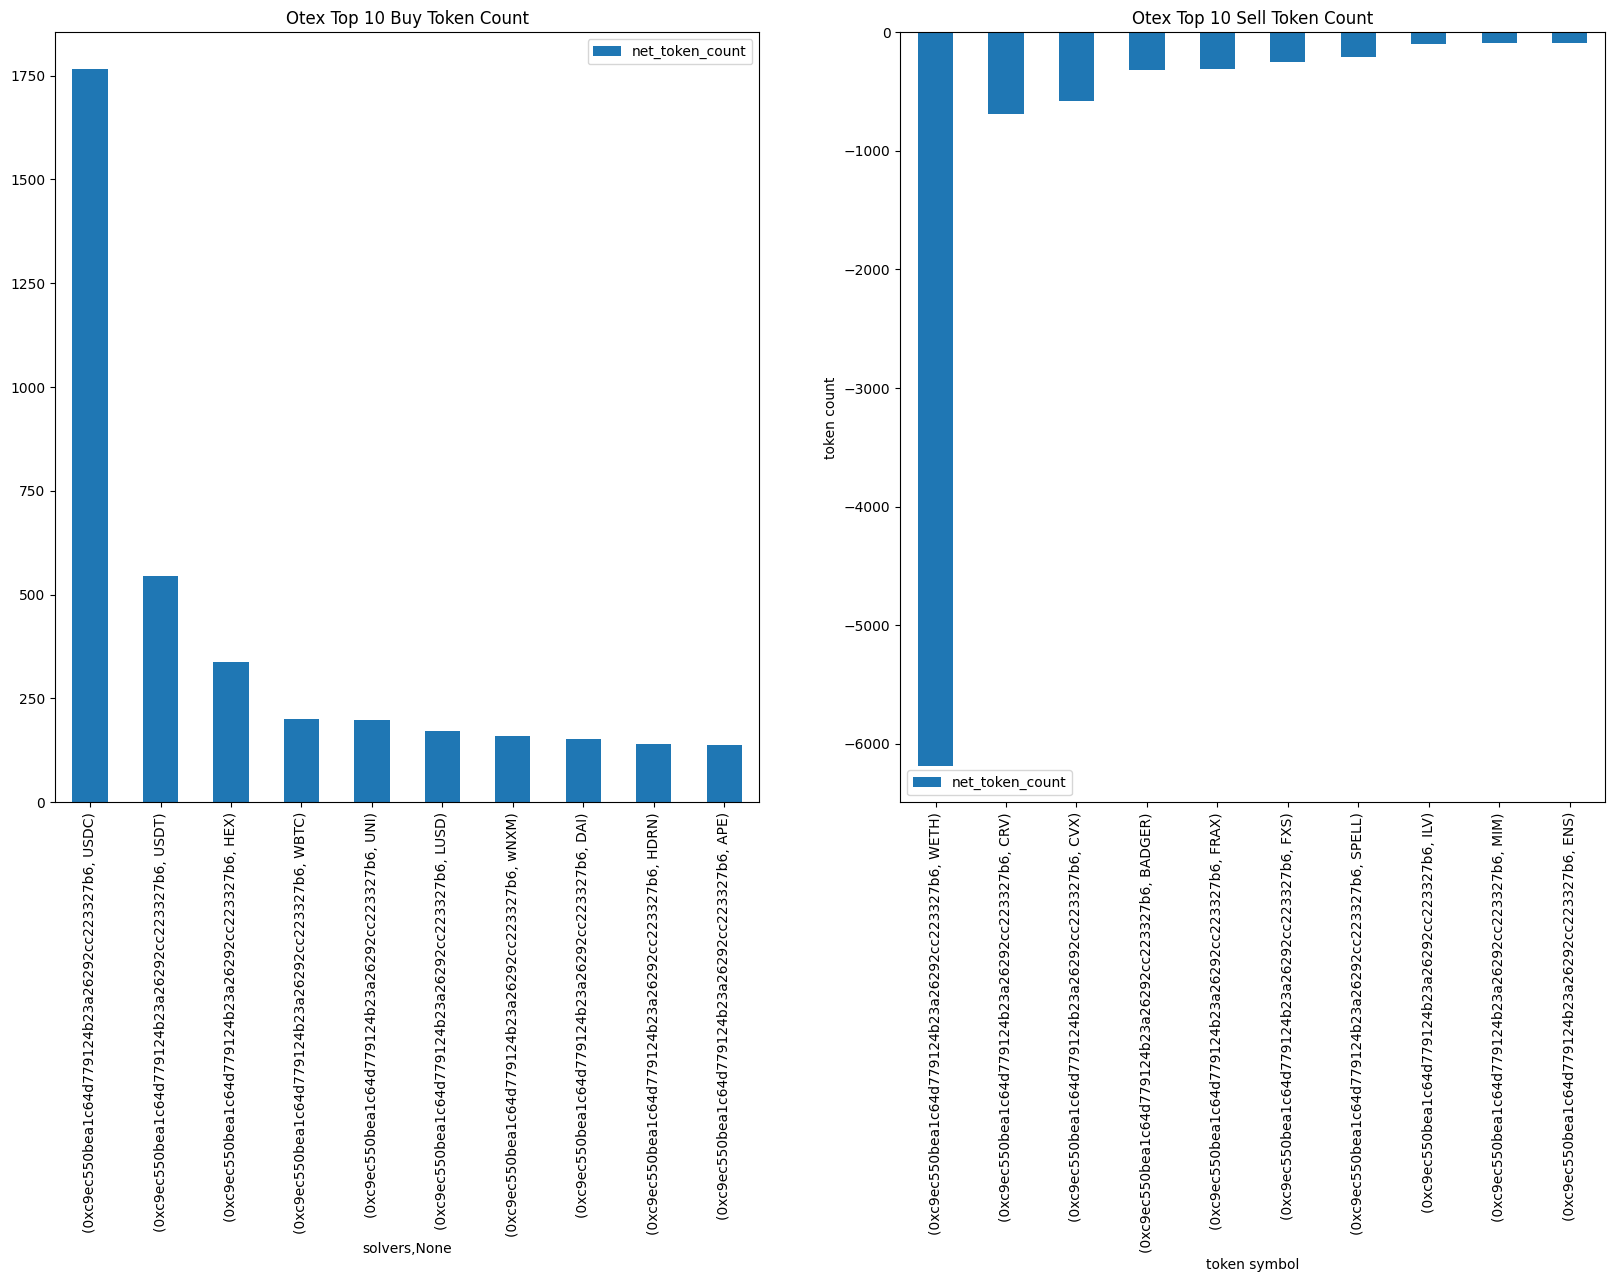

In [92]:
# plot the following two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

cow_buy_sell_vol.loc['Otex'].sort_values(by='net_token_count', ascending=False).head(10).plot(kind='bar', y='net_token_count', ax=ax1, title='Otex Top 10 Buy Token Count')
cow_buy_sell_vol.loc['Otex'].sort_values(by='net_token_count', ascending=True).head(10).plot(kind='bar', y='net_token_count', ax=ax2, title='Otex Top 10 Sell Token Count')

plt.ylabel('token count')
plt.xlabel('token symbol')

In [87]:
corr_matrix = cow_buy_sell_vol.loc['Gnosis_1inch']['net_token_count'].corr()

TypeError: Series.corr() missing 1 required positional argument: 'other'

Text(0.5, 1.0, 'Net Difference by Solver (in USD)')

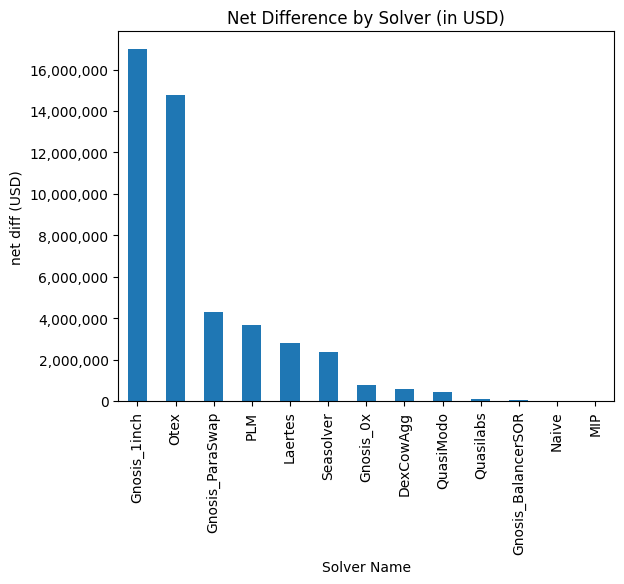

In [44]:
# plot the net_diff column results
TotalVolChainUSD.groupby(['name'])['net_diff'].sum().sort_values(ascending=False).plot(kind='bar')
# resize y axis numbers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel('Solver Name')
plt.ylabel('net diff (USD)')
plt.title('Net Difference by Solver (in USD)')

In [ ]:
TotalVolChainUSD.groupby(['name'])['net_diff'].sum().sort_values(ascending=False).plot(kind='bar')

 ### Show Chainlink last prices for each assetPair.

In [6]:
# get most recent assetPair prices by date. Print most current date
asset_pair_prices = cow_chain_df.groupby(['assetPair_id']).agg({'price': 'last', 'date': 'last'})

In [7]:
# sort by date and print top 50
asset_pair_prices.sort_values(by=['date'], ascending=False).head(50)

,price,date
assetPair_id,,
USDT/USD,0.999500,2022-12-30 17:29:11
UNI/USD,5.089000,2022-12-30 17:21:23
WBTC/USD,16532.045927,2022-12-30 16:56:23
APE/USD,3.577936,2022-12-30 16:56:23
DAI/USD,1.000098,2022-12-30 16:56:23
WETH/USD,1194.280000,2022-12-30 16:49:47
USDC/USD,1.000063,2022-12-30 16:37:11
FXS/USD,4.233306,2022-12-30 16:21:11
CRV/USD,0.512064,2022-12-30 16:21:11
